In [14]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 

In [15]:
df = pd.read_csv("mldata.csv")
df.head()

,age,height,weight,gender,likeness
0,27,170.688,76.0,Male,Biryani
1,41,165.000,70.0,Male,Biryani
2,29,171.000,80.0,Male,Biryani
3,27,173.000,102.0,Male,Biryani
4,29,164.000,67.0,Male,Biryani


In [16]:
df['gender'] = df['gender'].replace("Male",1)
df['gender'] = df['gender'].replace("Female",10)
df.tail()

,age,height,weight,gender,likeness
240,31,160.0,60.0,1,Pakora
241,26,172.0,70.0,1,Biryani
242,40,178.0,80.0,1,Biryani
243,25,5.7,65.0,1,Biryani
244,33,157.0,56.0,10,Samosa


In [17]:
# selection of input and output variables
X = df[["weight","gender"]]
y = df["likeness"]

In [18]:
# machine learning algorithm
# from sklearn.tree import DecisionTreeClassifier
# model = DecisionTreeClassifier().fit(X,y)
# model.predict([[80,1]])

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y)

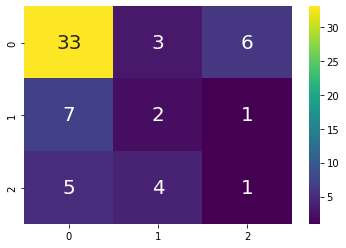

In [20]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import  confusion_matrix
import seaborn as sns
clf=KNeighborsClassifier(n_neighbors=1)
clf.fit(X_train,y_train)
pred=clf.predict(X_test)
con=confusion_matrix(y_test,pred)
ax=sns.heatmap(con,annot=True,cmap="viridis",annot_kws={"size":20})
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

In [21]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Biryani       0.73      0.79      0.76        42
      Pakora       0.22      0.20      0.21        10
      Samosa       0.12      0.10      0.11        10

    accuracy                           0.58        62
   macro avg       0.36      0.36      0.36        62
weighted avg       0.55      0.58      0.57        62



In [22]:
error_rate=[]#list that will store the average error rate value of k
for i in range (1,31):  #Took the range of k from 1 to 30
    clf=KNeighborsClassifier(n_neighbors=i)
    clf.fit(X_train,y_train)
    predict_i=clf.predict(X_test)
    error_rate.append(np.mean(predict_i!=y_test))
error_rate

[0.41935483870967744,
 0.3709677419354839,
 0.3709677419354839,
 0.3709677419354839,
 0.3387096774193548,
 0.3225806451612903,
 0.3225806451612903,
 0.3064516129032258,
 0.3064516129032258,
 0.2903225806451613,
 0.3064516129032258,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903,
 0.3225806451612903]

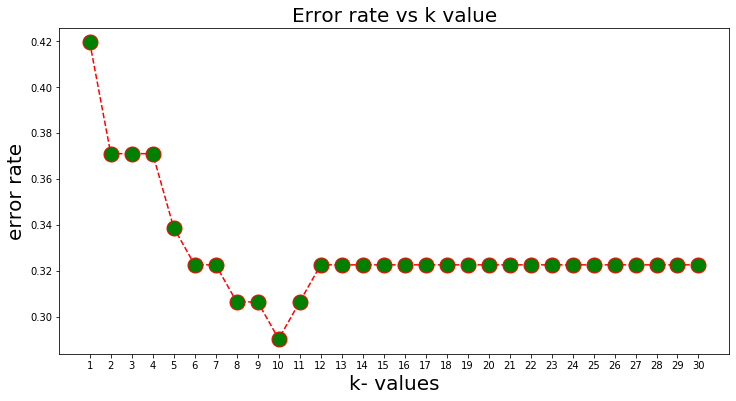

In [23]:
#plotting the error rate vs k graph 
plt.figure(figsize=(12,6))
plt.plot(range(1,31),error_rate,marker="o",markerfacecolor="green",
         linestyle="dashed",color="red",markersize=15)
plt.title("Error rate vs k value",fontsize=20)
plt.xlabel("k- values",fontsize=20)
plt.ylabel("error rate",fontsize=20)
plt.xticks(range(1,31))
plt.show()

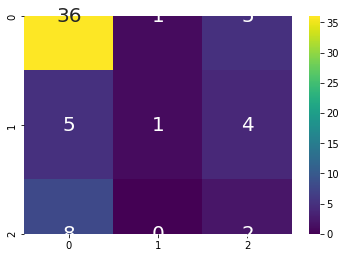

In [33]:
clf=KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train,y_train)
predicted_value=clf.predict(X_test)
con_mat=confusion_matrix(y_test,predicted_value)
sns.heatmap(con_mat,annot=True,annot_kws= 
                           {"size":20},cmap="viridis")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

Precision:
- Precision talks about how precise/accurate your model is out of those predicted positive, how many of them are actual positive.
- Precision is a good measure to determine, when the costs of False Positive is high. For instance, email spam detection. In email spam detection, a false positive means that an email that is non-spam (actual negative) has been identified as spam (predicted spam). The email user might lose important emails if the precision is not high for the spam detection model.

Recall:
- Recall actually calculates how many of the Actual Positives our model capture through labeling it as Positive (True Positive). Applying the same understanding, we know that Recall shall be the model metric we use to select our best model when there is a high cost associated with False Negative.
- For instance, in fraud detection or sick patient detection. If a fraudulent transaction (Actual Positive) is predicted as non-fraudulent (Predicted Negative), the consequence can be very bad for the bank.
- Similarly, in sick patient detection. If a sick patient (Actual Positive) goes through the test and predicted as not sick (Predicted Negative). The cost associated with False Negative will be extremely high if the sickness is contagious.


In [30]:
from sklearn.metrics import  classification_report
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

     Biryani       0.73      0.79      0.76        42
      Pakora       0.22      0.20      0.21        10
      Samosa       0.12      0.10      0.11        10

    accuracy                           0.58        62
   macro avg       0.36      0.36      0.36        62
weighted avg       0.55      0.58      0.57        62

